<a href="https://colab.research.google.com/github/rxgvnd/Machine-Learning/blob/master/W11_IraSuryani_31410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Ira Suryani Anggraini - 00000031410
#Q Learning Algorithm

!pip install gym

In [2]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys

In [4]:
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting

matplotlib.style.use('ggplot')

In [5]:
env = WindyGridworldEnv()

In [6]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    def policyFunction(state):
        
        Action_probabilities = np.ones(num_actions, dtype = float) * epsilon / num_actions
        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities
    
    return policyFunction

In [7]:
def qLearning(env, num_episodes, discount_factor = 1.0, alpha = 0.6, epsilon = 0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    stats = plotting.EpisodeStats(episode_lengths = np.zeros(num_episodes), episode_rewards = np.zeros(num_episodes))
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)
    for ith_episode in range(num_episodes):
        state = env.reset()
        for t in itertools.count():
            action_probabilities = policy(state)
            action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities)
            next_state, reward, done, _ = env.step(action)
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            
            if done:
                break
            state = next_state
    return Q, stats

In [ ]:
Q, stats = qLearning(env, 1000)

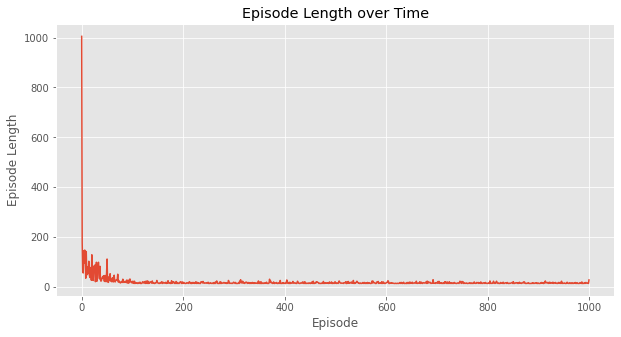

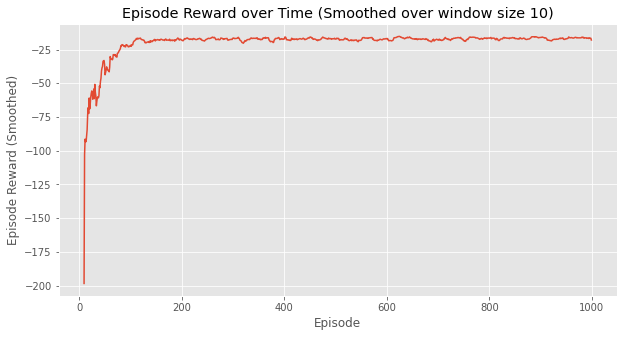

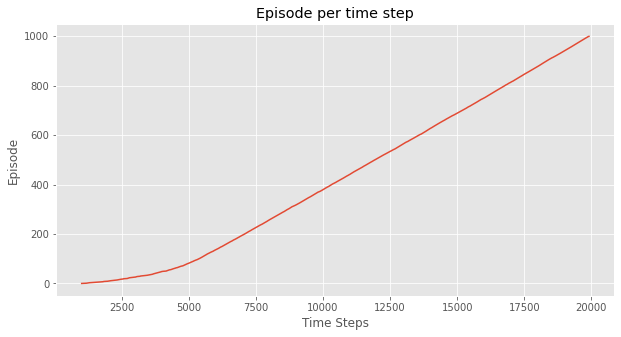

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats(stats)

In [ ]:
import numpy as np
import pylab as pl
import networkx as nx

In [ ]:
edges = [(0,1), (1,5), (5,6), (5,4), (1,2), (1,3), (9,10), (2,4), (0,6), (6,7), (8,9), (7,8), (1,7), (3,9)]

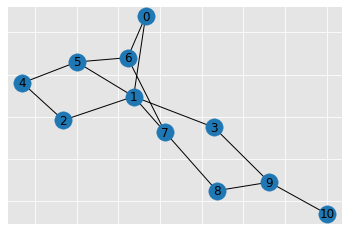

In [ ]:
goal =10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
pl.show()

In [ ]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
M *= 1

for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]]=0
        
M[goal, goal]=100
print(M)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[  1.   0.   1.   1.   1.   1.   0.   1.   1.   1.   1.]
 [  0.   1.   0.   0.   1.   0.   1.   0.   1.   1.   1.]
 [  1.   0.   1.   1.   0.   1.   1.   1.   1.   1.   1.]
 [  1.   0.   1.   1.   1.   1.   1.   1.   1.   0.   1.]
 [  1.   1.   0.   1.   1.   0.   1.   1.   1.   1.   1.]
 [  1.   0.   1.   1.   0.   1.   0.   1.   1.   1.   1.]
 [  0.   1.   1.   1.   1.   0.   1.   0.   1.   1.   1.]
 [  1.   0.   1.   1.   1.   1.   0.   1.   0.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   0.   1.   0.   1.]
 [  1.   1.   1.   0.   1.   1.   1.   1.   0.   1. 100.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   0. 100.]]


In [ ]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gamma = 0.75
initial_state =1

In [ ]:
def available_actions(state):
    current_state_row = M[state, ]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action
available_action = available_actions(initial_state)

In [ ]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action
action = sample_next_action(available_action)

In [ ]:
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma *max_value
    if(np.max(Q) > 0):
        return(np.sum(Q / np.max(Q)*100))
    else:
        return (0)

In [ ]:
update(initial_state, action, gamma)

0

In [ ]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)

Most efficient path: 
[0, 9, 10]


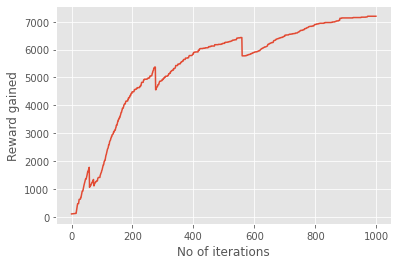

In [ ]:
current_state = 0
steps = [current_state]

while current_state != 10:
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path: ")
print(steps)
pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()

ValueError: ignored

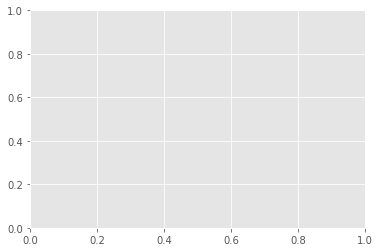

In [ ]:
police = [2, 4, 5]
drug_traces = [3, 8, 9]

G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 - Drug traces', 
           4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'Drug traces', 
           9:'9 - Drug traces', 10:'10 - Drug racket location'}
           
H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos, node_size =[200, 200, 200, 200, 200, 200, 200, 200])
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()

In [ ]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_state = 1

In [ ]:
def available_actions(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    return av_action

In [ ]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

In [ ]:
def collect_environmental_data(action):
    found = []
    if action in police:
        found.append('p')
    if action in drug_traces:
        found.append('d')
    return (found)

available_action = available_actions(initial_state)
action = sample_next_action(available_action)

In [ ]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    environment = collect_environmental_data(action)
    if 'p' in environment:
        env_police[current_state, action] += 1
    if 'd' in environment:
        env_drugs[current_state, action] += 1
    if (np.max(Q) > 0):
        return(np.sum(Q / np.max(Q)*100))
    else:
        return (0)
update(initial_state, action, gamma)

100.0

In [ ]:
def availabale_actions_with_env_help(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    env_pos_row = env_matrix_snap[state, av_action]
    if(np.sum(anev_pos_row < 0)):
        temp_av_action = av_action[np.array(env_pos_row)[0]>= 0]
        if len(temp_av_action) > 0:
            av_action = temp_av_action
        return av_action

In [ ]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)

In [ ]:
print('Police Found')
print(env_police)
print('')
print('Drug traces Found')
print(env_drugs)

Police Found
[[ 0.  0. 10.  0.  9.  7.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  7. 11.  0.  0.  0.  0.  0.]
 [ 0.  0.  7.  0.  7.  4.  0.  0.  0.  0.  0.]
 [ 0.  0.  8.  0.  8. 12.  0.  0.  0.  0.  0.]
 [ 0.  0.  8.  0.  4. 12.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  3.  7.  0.  0.  0.  0.  0.]
 [ 0.  0. 19.  0.  7.  8.  0.  0.  0.  0.  0.]
 [ 0.  0.  8.  0.  8.  9.  0.  0.  0.  0.  0.]
 [ 0.  0. 11.  0.  4. 11.  0.  0.  0.  0.  0.]
 [ 0.  0.  9.  0. 12.  4.  0.  0.  0.  0.  0.]
 [ 0.  0.  3.  0.  9.  2.  0.  0.  0.  0.  0.]]

Drug traces Found
[[ 0.  0.  0. 14.  0.  0.  0.  0.  8.  8.  0.]
 [ 0.  0.  0.  6.  0.  0.  0.  0.  3.  4.  0.]
 [ 0.  0.  0. 12.  0.  0.  0.  0. 12.  5.  0.]
 [ 0.  0.  0.  6.  0.  0.  0.  0.  8.  9.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0. 10. 11.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  9. 14.  0.]
 [ 0.  0.  0.  7.  0.  0.  0.  0.  0. 14.  0.]
 [ 0.  0.  0.  7.  0.  0.  0.  0.  8.  7.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0. 10.  7.  0.]
 [ 0.  0.  0. 11.  0.  0.  

In [ ]:
import gym
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.reset()
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [ ]:
state = env.encode(3, 1, 2, 0)
print("State:", state)
env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [ ]:
import numpy as np
import gym
env = gym.make('FrozenLake-v0')

In [ ]:
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

Q = np.zeros((env.observation_space.n, env.action_space.n))

In [ ]:
def choose_action(state):
    action=0
    if np.random.uniform(0,1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + alpha * (target - predict)

In [ ]:
reward = 0

for episode in range(total_episodes):
    t = 0
    state1 = env.reset()
    action1 = choose_action(state1)
    
    while t < max_steps:
        env.render()
        state2, reward, done, info = env.step(action1)
        action2 = choose_action(state2)
        update(state1, state2, reward, action1, action2)
        state1 = state2
        action1 = action2
        t += 1
        reward += 1
        if done:
            break

Streaming output truncated to the last 5000 lines.
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  

In [ ]:
print("Performance : ", reward/total_episodes)
print(Q)

Performance :  0.0001
[[1.11484528e-03 1.81980584e-03 3.16487621e-03 2.06015803e-03]
 [2.33546012e-03 9.64475591e-04 4.78974569e-03 1.31391358e-03]
 [4.22791140e-01 2.31071913e-04 7.27583805e-04 4.45499492e-03]
 [1.81059645e-02 2.36140624e-04 4.12852448e-05 8.66801043e-04]
 [2.12182034e-03 1.26655270e-03 1.10045979e-02 7.86748482e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.09864176e-03 7.85010124e-02 9.72046729e-02 8.84453333e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.02091159e-02 2.53168675e-03 2.00440510e-03 1.38215850e-02]
 [1.34660932e-03 2.22434462e-01 3.96724998e-01 5.90354612e-04]
 [1.96796661e-03 2.80466390e-03 9.68086120e-02 4.21230467e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.34491310e-02 1.61125051e-01 4.14266666e-01 1.83650043e-01]
 [5.17267136e-02 9.82615651e-01 7.83844260e-01 2.25859466e-01]
 [0.00000000e+00 0.00000000e+00 0